# Explore here

In [2]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el dataset desde el enlace
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
data = pd.read_csv(url)

# Seleccionar solo las columnas relevantes
data = data[['Latitude', 'Longitude', 'MedInc']]

# Dividir el dataset en conjunto de entrenamiento (train) y prueba (test)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Mostrar algunas filas para verificar
print("Datos de entrenamiento:")
print(train_data.head())

print("\nDatos de prueba:")
print(test_data.head())

Datos de entrenamiento:
       Latitude  Longitude  MedInc
7061      33.93    -118.02  4.1312
14689     32.79    -117.09  2.8631
17323     34.59    -120.14  4.2026
10056     39.26    -121.00  3.1094
15750     37.77    -122.45  3.3068

Datos de prueba:
       Latitude  Longitude  MedInc
20046     36.06    -119.01  1.6812
3024      35.14    -119.46  2.5313
15663     37.80    -122.44  3.4801
20484     34.28    -118.72  5.7376
9814      36.62    -121.93  3.7250


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB
None


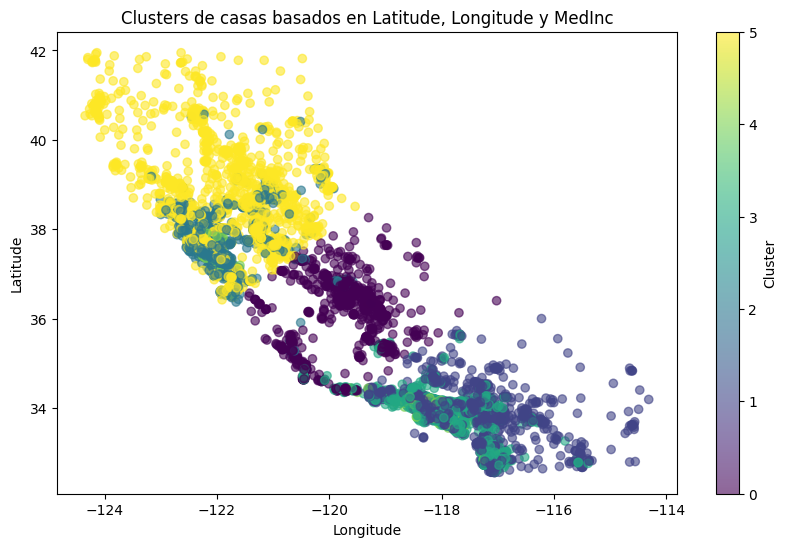

In [4]:
# Importar librerías necesarias
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir el modelo K-Means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Entrenar el modelo y predecir los clusters
train_data['cluster'] = kmeans.fit_predict(train_data[['Latitude', 'Longitude', 'MedInc']])

# Convertir la columna 'cluster' en categórica
train_data['cluster'] = train_data['cluster'].astype('category')

# Graficar los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'].cat.codes, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas basados en Latitude, Longitude y MedInc')
plt.show()

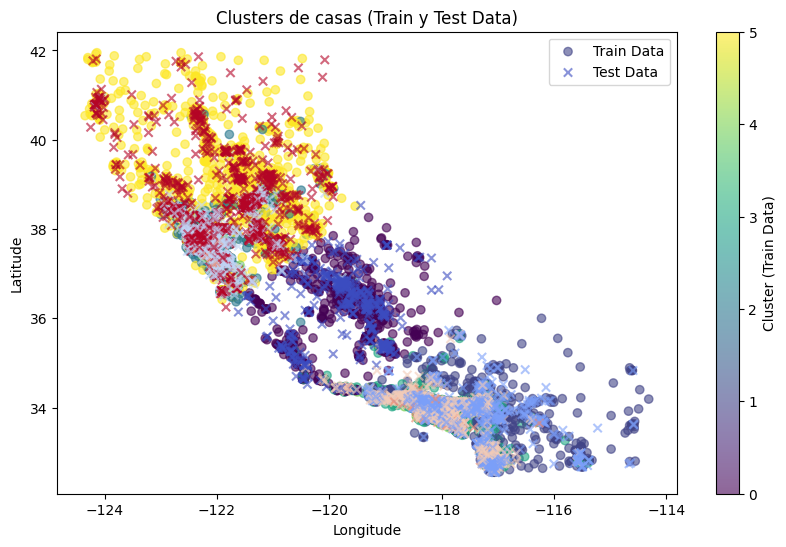

In [5]:
# Predecir los clusters para el conjunto de test
test_data['cluster'] = kmeans.predict(test_data[['Latitude', 'Longitude', 'MedInc']])

# Convertir la columna 'cluster' en categórica
test_data['cluster'] = test_data['cluster'].astype('category')

# Graficar los clusters de entrenamiento y test juntos
plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento
scatter_train = plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'].cat.codes, cmap='viridis', alpha=0.6, label='Train Data')

# Graficar los datos de prueba
scatter_test = plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['cluster'].cat.codes, cmap='coolwarm', marker='x', alpha=0.6, label='Test Data')

# Añadir leyenda y etiquetas
plt.colorbar(scatter_train, label='Cluster (Train Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas (Train y Test Data)')
plt.legend()
plt.show()

Evaluación 

In [6]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calcular Inercia (WCSS)
inertia = kmeans.inertia_
print(f"Inercia: {inertia}")

# Calcular el Coeficiente de Silueta
silhouette_avg = silhouette_score(train_data[['Latitude', 'Longitude', 'MedInc']], train_data['cluster'])
print(f"Coeficiente de Silueta: {silhouette_avg}")

# Calcular el Índice de Davies-Bouldin
db_score = davies_bouldin_score(train_data[['Latitude', 'Longitude', 'MedInc']], train_data['cluster'])
print(f"Índice de Davies-Bouldin: {db_score}")

# Calcular el Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(train_data[['Latitude', 'Longitude', 'MedInc']], train_data['cluster'])
print(f"Índice de Calinski-Harabasz: {ch_score}")

Inercia: 27898.298856121477
Coeficiente de Silueta: 0.4007726269062719
Índice de Davies-Bouldin: 0.8305790388553475
Índice de Calinski-Harabasz: 15362.445528822343


En conjunto, los resultados indican que el clustering es razonablemente bueno. La inercia es moderada (lo que significa que los puntos están agrupados, pero no extremadamente apretados), el coeficiente de silueta sugiere que los clusters no se superponen excesivamente, y los índices de Davies-Bouldin y Calinski-Harabasz refuerzan la idea de que los clusters son coherentes y bien separados.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preparar los datos
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']

X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

# Entrenar el modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9949935400516796

Matriz de Confusión:
[[ 490    0    0    1    0    4]
 [   1 2191    0    3    0    0]
 [   1    0  801    0    0    4]
 [   1    5    0 1117    0    0]
 [   0    0    2    1  129    0]
 [   0    0    8    0    0 1433]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       495
           1       1.00      1.00      1.00      2195
           2       0.99      0.99      0.99       806
           3       1.00      0.99      1.00      1123
           4       1.00      0.98      0.99       132
           5       0.99      0.99      0.99      1441

    accuracy                           0.99      6192
   macro avg       0.99      0.99      0.99      6192
weighted avg       1.00      0.99      0.99      6192



El proceso de etiquetado no supervisado se valida mediatnte el RandomForest al observar la calidad de la predicción supervisada.